In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
train_path = '../datasets/emotions/emotions-train.arff'
test_path = '../datasets/emotions/emotions-test.arff'
num_features = 72
train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)
test_data = arff.load(open(test_path, 'rt'))
test_data = np.array(test_data['data']).astype(np.float32)
a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 202/202 [00:00<00:00, 8492.79it/s]

Train data shape:  (391, 1, 432)
Train labels shape:  (391, 6)
Test data shape:  (202, 1, 432)
Test labels shape:  (202, 6)


## CIFDM Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  (130, 1, 432)
Train Labels shape is  (130, 2)
Classes trained are: 0 to 2


  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 4
Class 1, class 1 neurons = 3, class 0 neurons = 4


100%|██████████| 2000/2000 [39:16<00:00,  1.18s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.25      |
| zero_one_loss       | 0.405941  |
| one_error           | 0.0940594 |
| micro av. jaccard   | 0.36875   |
| macro av. jaccard   | 0.368492  |
| micro av. precision | 0.556604  |
| macro av. precision | 0.56423   |
| micro av. recall    | 0.522124  |
| macro av. recall    | 0.520402  |
| micro av. f1        | 0.538813  |
| macro av. f1        | 0.538533  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.25      |
| zero_one_loss       | 0.405941  |
| one_error           | 0.0940594 |
| micro av. jaccard   | 0.36875   |
| macro av. jaccard   | 0.368492  |
| micro av. precision | 0.556604  |
| macro av. pr

  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 8
Class 1, class 1 neurons = 6, class 0 neurons = 7
Class 2, class 1 neurons = 3, class 0 neurons = 5
Class 3, class 1 neurons = 2, class 0 neurons = 3


100%|██████████| 2000/2000 [1:33:15<00:00,  2.80s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.235149  |
| zero_one_loss       | 0.40099   |
| one_error           | 0.0693069 |
| micro av. jaccard   | 0.522613  |
| macro av. jaccard   | 0.537297  |
| micro av. precision | 0.702703  |
| macro av. precision | 0.70996   |
| micro av. recall    | 0.670968  |
| macro av. recall    | 0.685381  |
| micro av. f1        | 0.686469  |
| macro av. f1        | 0.697206  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 4) (202, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.252475 |
| zero_one_loss       | 0.693069 |
| one_error           | 0        |
| micro av. jaccard   | 0.412104 |
| macro av. jaccard   | 0.400531 |
| micro av. precision | 0.644144 |
| macro av. precision 

  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 10
Class 1, class 1 neurons = 8, class 0 neurons = 11
Class 2, class 1 neurons = 7, class 0 neurons = 8
Class 3, class 1 neurons = 3, class 0 neurons = 7
Class 4, class 1 neurons = 2, class 0 neurons = 5
Class 5, class 1 neurons = 3, class 0 neurons = 4


100%|██████████| 2000/2000 [2:39:45<00:00,  4.79s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.227723 |
| zero_one_loss       | 0.405941 |
| one_error           | 0.049505 |
| micro av. jaccard   | 0.468208 |
| macro av. jaccard   | 0.468141 |
| micro av. precision | 0.658537 |
| macro av. precision | 0.658155 |
| micro av. recall    | 0.618321 |
| macro av. recall    | 0.618564 |
| micro av. f1        | 0.637795 |
| macro av. f1        | 0.637733 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 6) (202, 6)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.256601 |
| zero_one_loss       | 0.826733 |
| one_error           | 0        |
| micro av. jaccard   | 0.415414 |
| macro av. jaccard   | 0.413955 |
| micro av. precision | 0.624294 |
| macro av. precision | 0.616607 |


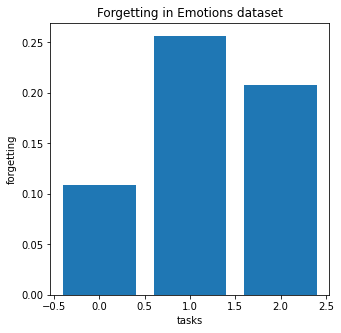

(None,)

In [3]:
hparams_dict = {
    'inputs': 432,
    'outputs': 6,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-3,
    'sim_time': 600,
    'n_epochs': 2000,
    'print_every': 200,
    'name': 'Emotions',
    'tasks': {'samples': [130, 130, 131], 'labels': [2, 2, 2]},
    'seed': 2,
    'ckpt_dir': './checkpoints/emotions',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (130, 1, 432)
Train Labels shape is  (130, 2)
Classes trained are: 0 to 2


  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 3
Class 1, class 1 neurons = 5, class 0 neurons = 3


100%|██████████| 2000/2000 [38:31<00:00,  1.16s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.193069  |
| zero_one_loss       | 0.381188  |
| one_error           | 0.0049505 |
| micro av. jaccard   | 0.450704  |
| macro av. jaccard   | 0.450198  |
| micro av. precision | 0.719101  |
| macro av. precision | 0.718242  |
| micro av. recall    | 0.547009  |
| macro av. recall    | 0.54661   |
| micro av. f1        | 0.621359  |
| macro av. f1        | 0.620032  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.193069  |
| zero_one_loss       | 0.381188  |
| one_error           | 0.0049505 |
| micro av. jaccard   | 0.450704  |
| macro av. jaccard   | 0.450198  |
| micro av. precision | 0.719101  |
| macro av. pr

  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 9
Class 1, class 1 neurons = 6, class 0 neurons = 10
Class 2, class 1 neurons = 2, class 0 neurons = 4
Class 3, class 1 neurons = 2, class 0 neurons = 5


100%|██████████| 2000/2000 [1:36:32<00:00,  2.90s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.311881 |
| zero_one_loss       | 0.50495  |
| one_error           | 0.118812 |
| micro av. jaccard   | 0.340314 |
| macro av. jaccard   | 0.352413 |
| micro av. precision | 0.524194 |
| macro av. precision | 0.592162 |
| micro av. recall    | 0.492424 |
| macro av. recall    | 0.493963 |
| micro av. f1        | 0.507812 |
| macro av. f1        | 0.51601  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 4) (202, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.27104  |
| zero_one_loss       | 0.722772 |
| one_error           | 0        |
| micro av. jaccard   | 0.350148 |
| macro av. jaccard   | 0.357944 |
| micro av. precision | 0.572816 |
| macro av. precision | 0.619593 |


  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 11
Class 1, class 1 neurons = 7, class 0 neurons = 13
Class 2, class 1 neurons = 3, class 0 neurons = 9
Class 3, class 1 neurons = 3, class 0 neurons = 10
Class 4, class 1 neurons = 3, class 0 neurons = 4
Class 5, class 1 neurons = 2, class 0 neurons = 4


100%|██████████| 2000/2000 [2:38:59<00:00,  4.77s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.257426  |
| zero_one_loss       | 0.435644  |
| one_error           | 0.0792079 |
| micro av. jaccard   | 0.485149  |
| macro av. jaccard   | 0.488281  |
| micro av. precision | 0.653333  |
| macro av. precision | 0.652518  |
| micro av. recall    | 0.653333  |
| macro av. recall    | 0.660301  |
| micro av. f1        | 0.653333  |
| macro av. f1        | 0.656085  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 6) (202, 6)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.274752 |
| zero_one_loss       | 0.846535 |
| one_error           | 0        |
| micro av. jaccard   | 0.396739 |
| macro av. jaccard   | 0.399453 |
| micro av. precision | 0.58871  |
| macro av. precision 

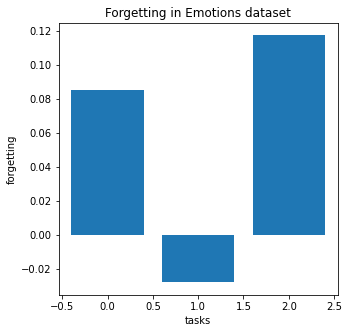

(None,)

In [4]:
hparams_dict = {
    'inputs': 432,
    'outputs': 6,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-3,
    'sim_time': 600,
    'n_epochs': 2000,
    'print_every': 200,
    'name': 'Emotions',
    'tasks': {'samples': [130, 130, 131], 'labels': [2, 2, 2]},
    'seed': 3,
    'ckpt_dir': './checkpoints/emotions',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (130, 1, 432)
Train Labels shape is  (130, 2)
Classes trained are: 0 to 2


  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 3, class 0 neurons = 3
Class 1, class 1 neurons = 5, class 0 neurons = 3


100%|██████████| 2000/2000 [39:46<00:00,  1.19s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.225248  |
| zero_one_loss       | 0.39604   |
| one_error           | 0.0544554 |
| micro av. jaccard   | 0.441718  |
| macro av. jaccard   | 0.437921  |
| micro av. precision | 0.692308  |
| macro av. precision | 0.692012  |
| micro av. recall    | 0.549618  |
| macro av. recall    | 0.544521  |
| micro av. f1        | 0.612766  |
| macro av. f1        | 0.608519  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.225248  |
| zero_one_loss       | 0.39604   |
| one_error           | 0.0544554 |
| micro av. jaccard   | 0.441718  |
| macro av. jaccard   | 0.437921  |
| micro av. precision | 0.692308  |
| macro av. pr

  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 6, class 0 neurons = 7
Class 1, class 1 neurons = 6, class 0 neurons = 10
Class 2, class 1 neurons = 2, class 0 neurons = 3
Class 3, class 1 neurons = 4, class 0 neurons = 3


100%|██████████| 2000/2000 [1:34:30<00:00,  2.84s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.205446 |
| zero_one_loss       | 0.391089 |
| one_error           | 0.019802 |
| micro av. jaccard   | 0.442953 |
| macro av. jaccard   | 0.446107 |
| micro av. precision | 0.647059 |
| macro av. precision | 0.62931  |
| micro av. recall    | 0.584071 |
| macro av. recall    | 0.576585 |
| micro av. f1        | 0.613953 |
| macro av. f1        | 0.600558 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 4) (202, 4)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.220297 |
| zero_one_loss       | 0.628713 |
| one_error           | 0        |
| micro av. jaccard   | 0.429487 |
| macro av. jaccard   | 0.430517 |
| micro av. precision | 0.663366 |
| macro av. precision | 0.652873 |


  0%|          | 0/2000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 8, class 0 neurons = 11
Class 1, class 1 neurons = 7, class 0 neurons = 14
Class 2, class 1 neurons = 3, class 0 neurons = 7
Class 3, class 1 neurons = 7, class 0 neurons = 6
Class 4, class 1 neurons = 1, class 0 neurons = 5
Class 5, class 1 neurons = 2, class 0 neurons = 4


100%|██████████| 2000/2000 [2:39:39<00:00,  4.79s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 2) (202, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.316832 |
| zero_one_loss       | 0.524752 |
| one_error           | 0.108911 |
| micro av. jaccard   | 0.396226 |
| macro av. jaccard   | 0.383233 |
| micro av. precision | 0.595745 |
| macro av. precision | 0.578581 |
| micro av. recall    | 0.541935 |
| macro av. recall    | 0.525689 |
| micro av. f1        | 0.567568 |
| macro av. f1        | 0.550854 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(202, 6) (202, 6)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.242574 |
| zero_one_loss       | 0.806931 |
| one_error           | 0        |
| micro av. jaccard   | 0.445283 |
| macro av. jaccard   | 0.44206  |
| micro av. precision | 0.643052 |
| macro av. precision | 0.639238 |


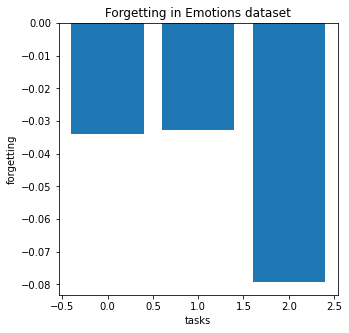

(None,)

In [5]:
hparams_dict = {
    'inputs': 432,
    'outputs': 6,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-3,
    'sim_time': 600,
    'n_epochs': 2000,
    'print_every': 200,
    'name': 'Emotions',
    'tasks': {'samples': [130, 130, 131], 'labels': [2, 2, 2]},
    'seed': 4,
    'ckpt_dir': './checkpoints/emotions',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)